In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import seaborn as sns
df = pd.read_csv("data/mini.csv")




In [19]:
df['subscription_type_bool'] = df['subscription_type']!='Basic'

df['preferred_difficulty_level_num']=df['preferred_difficulty_level'].apply(lambda x : 0 if x=="Low" else ( 1 if x=="Medium" else 2 ) )

df["payment_pattern1"] =(4<=df["payment_pattern"] )&(df["payment_pattern"]<=7)
df["payment_pattern2"] =(2==df["payment_pattern"] )|(df["payment_pattern"]==3)|(df["payment_pattern"]==6)|(df["payment_pattern"]==7)
df["payment_pattern3"] =(1==df["payment_pattern"] )|(df["payment_pattern"]==3)|(df["payment_pattern"]==5)|(df["payment_pattern"]==7)

df['preferred_difficulty_level_low'] = df['preferred_difficulty_level'] == 'Low'
df['preferred_difficulty_level_medium'] = df['preferred_difficulty_level'] == 'Medium'
df['preferred_difficulty_level_high'] = df['preferred_difficulty_level'] == 'High'


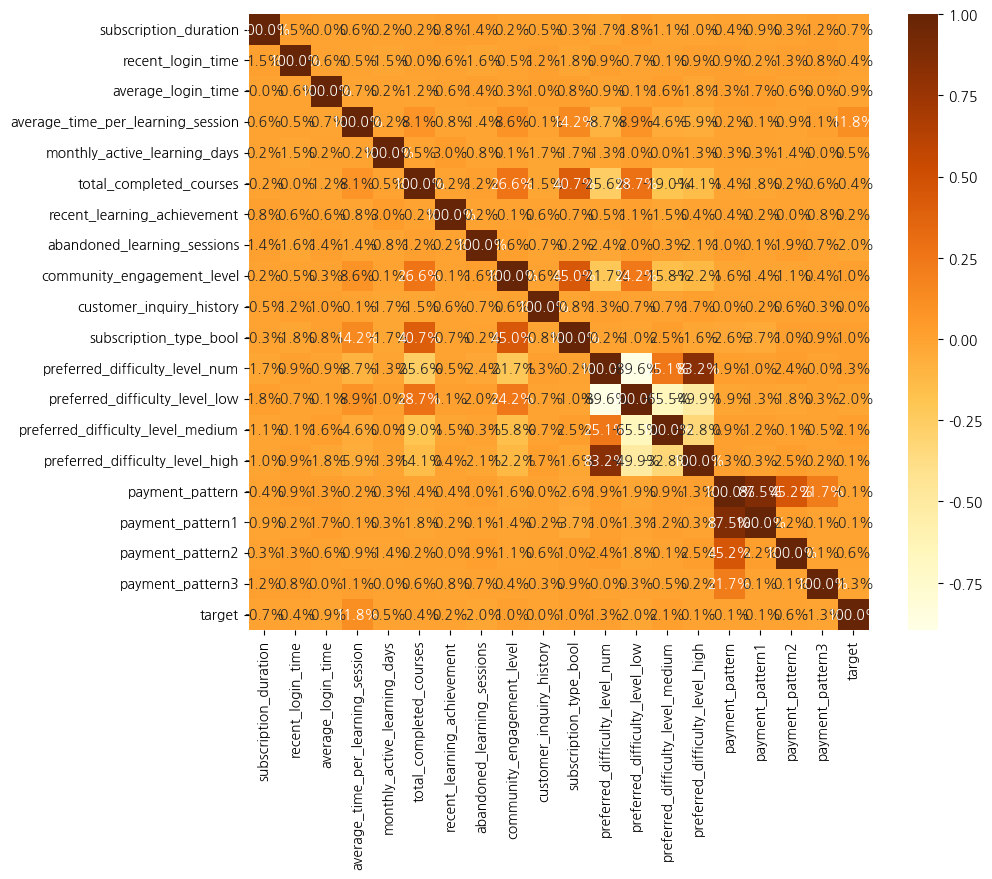

In [46]:
df_c = df[[
 'subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'customer_inquiry_history',
 'subscription_type_bool',
 'preferred_difficulty_level_num',
 'preferred_difficulty_level_low',
 'preferred_difficulty_level_medium',
 'preferred_difficulty_level_high',
 'payment_pattern',
 'payment_pattern1',
 'payment_pattern2',
 'payment_pattern3',
 'target']]
corr=df_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')

plt.show()

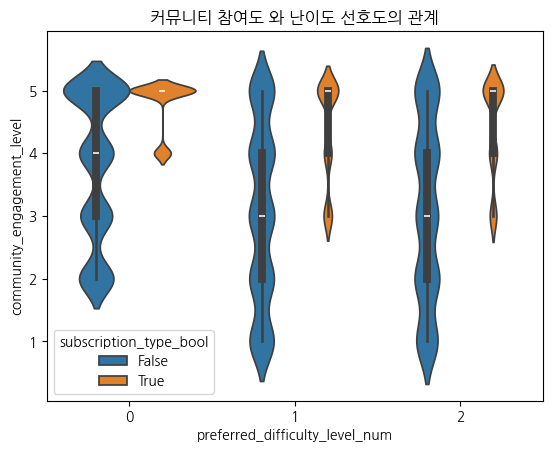

In [49]:
sns.violinplot(y="community_engagement_level", x="preferred_difficulty_level_num", hue="subscription_type_bool", data=df[["community_engagement_level","preferred_difficulty_level_num","subscription_type_bool"]])
plt.title("커뮤니티 참여도 와 난이도 선호도의 관계")
plt.show()

# 가설 : 프리미엄 , 어려운 난이도를 좋아하는 유저의 커뮤니티 참여도 5가 되면 구독유지에 좋다.

# 1번 그래프 : 
*  사용기간 4개월 부터 9개월까지 6개월 이용자
*  average_time_per_learning_session 200 이하




난이도 높음 선호,Premium,참여도 3


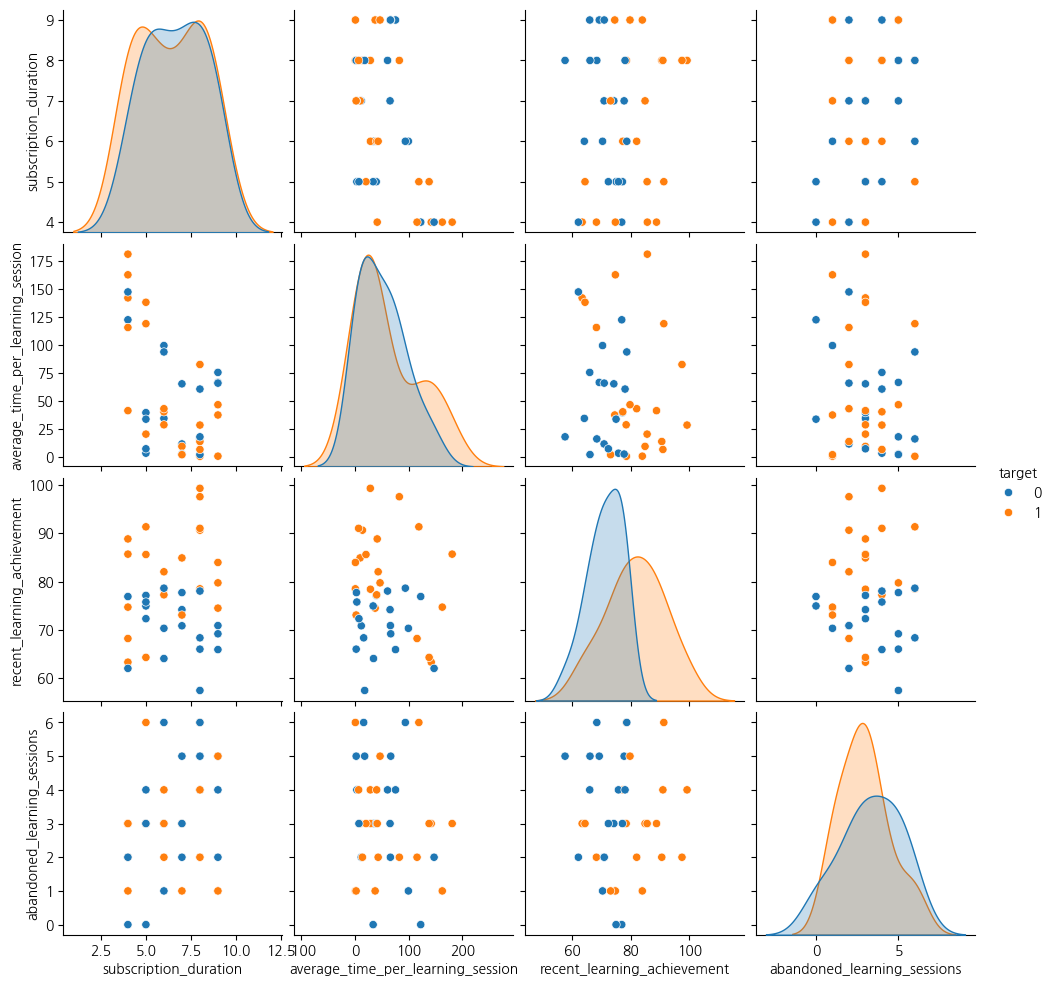

난이도 높음 선호,Premium,참여도 4


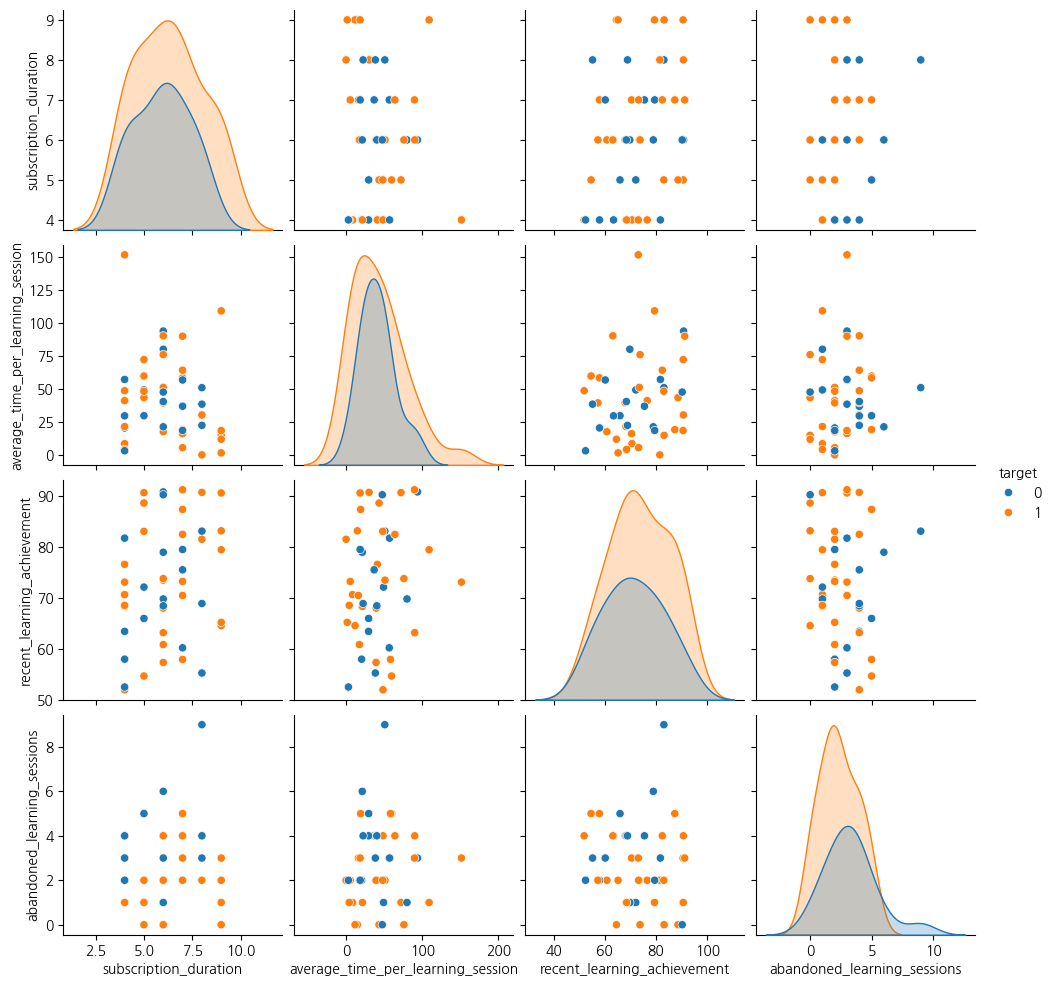

난이도 높음 선호,Premium,참여도 5


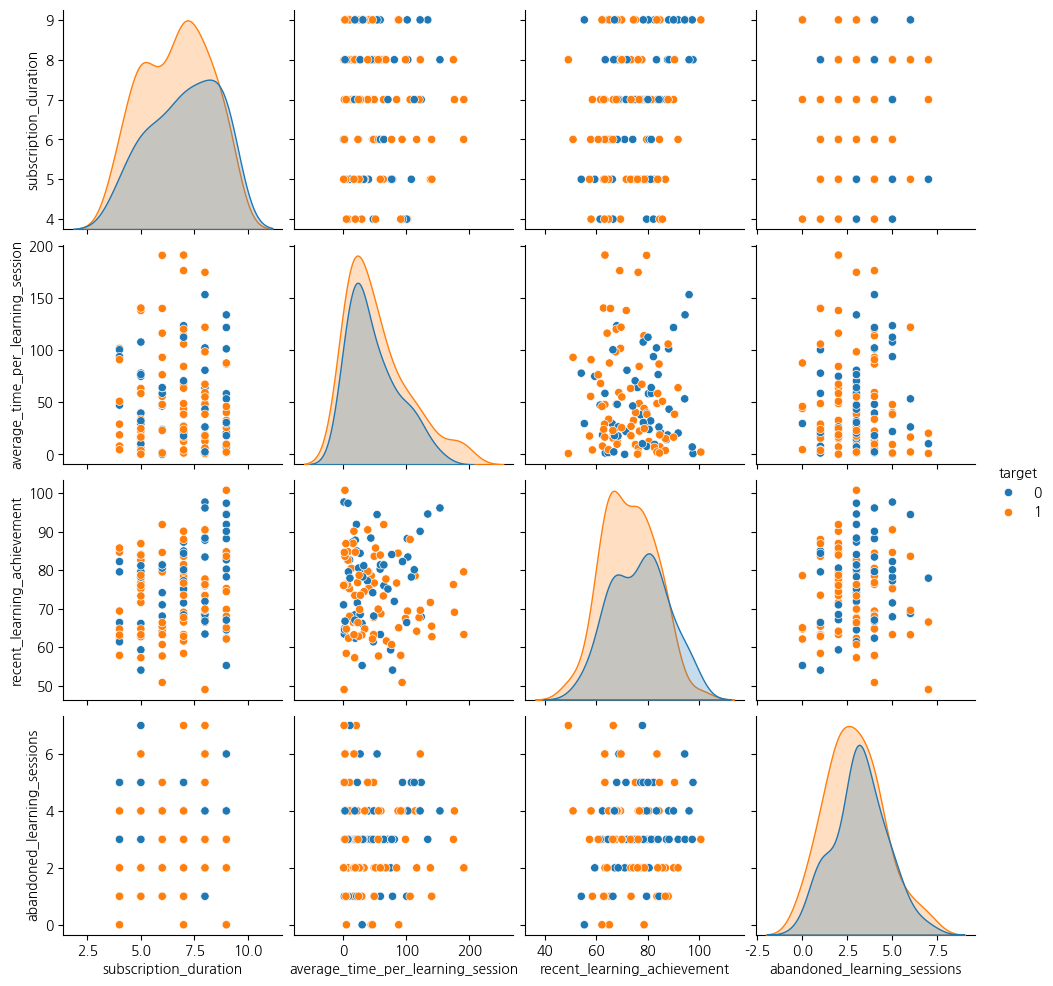

In [26]:

import itertools
import time
i = ['preferred_difficulty_level_num','subscription_type_bool','community_engagement_level']
l = {'preferred_difficulty_level_num':"난이도 선호도",'subscription_type_bool':"구독 유형",'community_engagement_level':"커뮤니티 참여도"}
category = {'preferred_difficulty_level_num':[2],"subscription_type_bool":[True],'community_engagement_level':[3,4,5]}
category_name={'preferred_difficulty_level_num':["난이도 높음 선호"],'community_engagement_level':["참여도 3","참여도 4","참여도 5"],"subscription_type_bool":["Premium"]}
data = list

ddaf = df[df['average_time_per_learning_session'] <=200]
ddaf = ddaf[(ddaf['subscription_duration']<10)&(ddaf['subscription_duration']>3)]#.apply(lambda x : 10 if x < 6 else (20 if x < 11 else (30 if x < 17 else 40) ) )

for ji,j in enumerate(category.get(i[0])):
    
    aaaa1 = ddaf[ddaf[i[0]]==j]  
    
    for ki,k in enumerate(category.get(i[1])):
        aaaa2 = aaaa1[aaaa1[i[1]]==k]
        
        for li,l in enumerate(category.get(i[2])):
            print(f'{category_name.get(i[0])[ji]},{category_name.get(i[1])[ki]},{category_name.get(i[2])[li]}')
            aaaa3 = aaaa2[aaaa2[i[2]]==l]
        
        
            sns.pairplot(aaaa3[['subscription_duration','average_time_per_learning_session',
   'recent_learning_achievement', 'abandoned_learning_sessions','target']], hue="target" )
            plt.show()
            time.sleep(1)

# 2번 그래프 : 
* 최근 3개월 내 이용자
* average_time_per_learning_session 200 이하

난이도 높음 선호,Premium,참여도 3


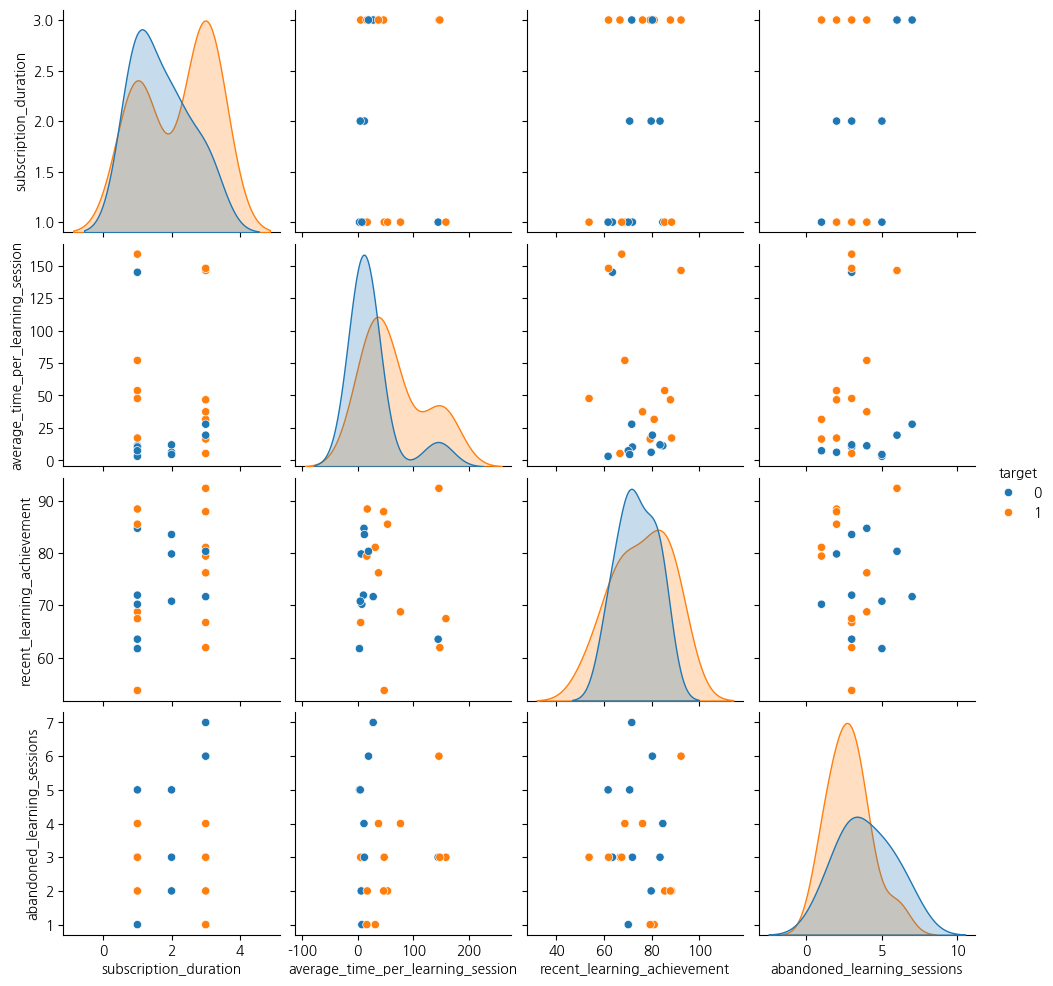

난이도 높음 선호,Premium,참여도 4


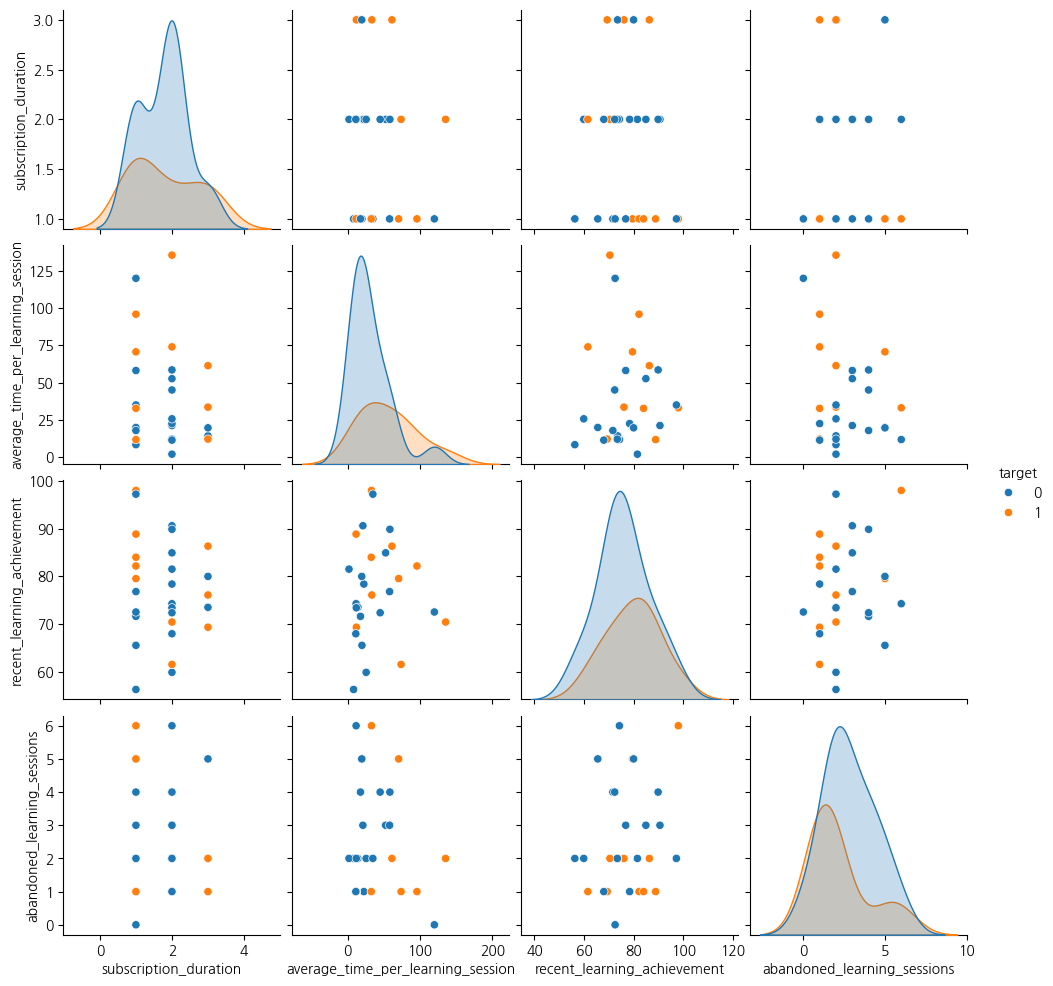

난이도 높음 선호,Premium,참여도 5


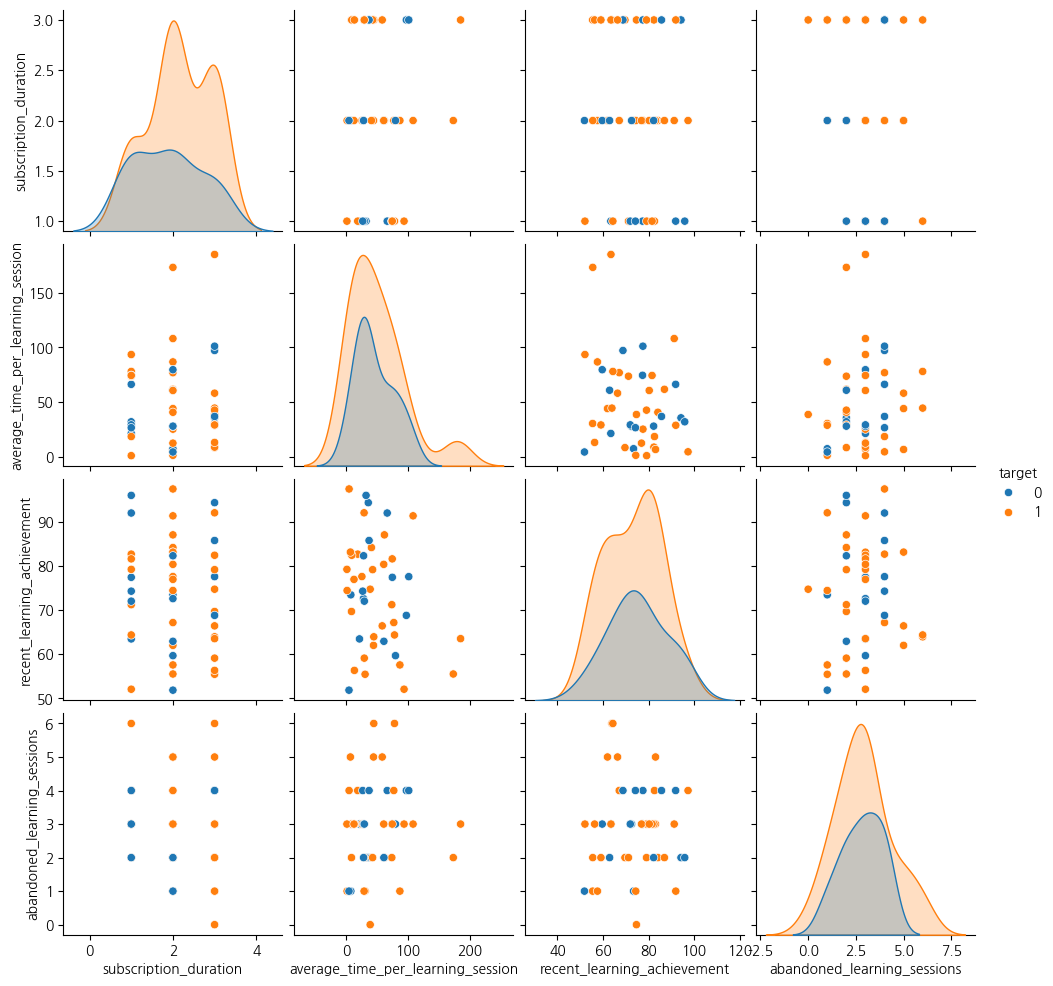

In [38]:

import itertools
import time
i = ['preferred_difficulty_level_num','subscription_type_bool','community_engagement_level']
l = {'preferred_difficulty_level_num':"난이도 선호도",'subscription_type_bool':"구독 유형",'community_engagement_level':"커뮤니티 참여도"}
category = {'preferred_difficulty_level_num':[2],"subscription_type_bool":[True],'community_engagement_level':[3,4,5]}
category_name={'preferred_difficulty_level_num':["난이도 높음 선호"],'community_engagement_level':["참여도 3","참여도 4","참여도 5"],"subscription_type_bool":["Premium"]}
data = list

ddaf = df[df['average_time_per_learning_session'] <=200]
ddaf = ddaf[(ddaf['subscription_duration']<4)]#.apply(lambda x : 10 if x < 6 else (20 if x < 11 else (30 if x < 17 else 40) ) )

for ji,j in enumerate(category.get(i[0])):
    
    aaaa1 = ddaf[ddaf[i[0]]==j]  
    
    for ki,k in enumerate(category.get(i[1])):
        aaaa2 = aaaa1[aaaa1[i[1]]==k]
        
        for li,l in enumerate(category.get(i[2])):
            print(f'{category_name.get(i[0])[ji]},{category_name.get(i[1])[ki]},{category_name.get(i[2])[li]}')
            aaaa3 = aaaa2[aaaa2[i[2]]==l]
        
        
            sns.pairplot(aaaa3[['subscription_duration','average_time_per_learning_session',
   'recent_learning_achievement', 'abandoned_learning_sessions','target']], hue="target" )
            plt.show()
            time.sleep(1)

# 3번 그래프 : 
* average_time_per_learning_session 200 이상

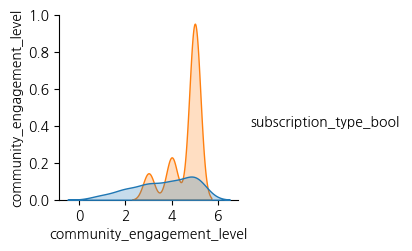

In [56]:
ddf=df[df['average_time_per_learning_session'] >200]
sns.pairplot(ddf[[
       'community_engagement_level','subscription_type_bool'
       ]], hue="subscription_type_bool" )
plt.title("")
plt.show()